# Example 1 Analysis

We will plot the rate binned in energy deposition, as well as the cross section reach.

## Packages

In [1]:
import numpy as np

# some personal preferences for nice plots
%run "../../utilities/output_parser/plotter.ipynb"

# helpful functions for processing output
import sys
sys.path.append("../../utilities/output_parser")
import EXDMDataHandler
from EXDMDataHandler import EXDMData

## Data

In [2]:
data = EXDMData(filename = './output/EXDM_out_example_1.hdf5')

## Results

### Binned Scatter Rate

#### Data

In [3]:
[ E_bin_LHS, binned_scatter_rate_E_heavy ] = data.get_binned_scatter_rate_E(mass_MeV = 10**3, 
                                                                      med_FF = 0., 
                                                                      sigma_cm2 = 10**(-40),
                                                                      E_bin_width = 2.)

[ E_bin_LHS, binned_scatter_rate_E_light ] = data.get_binned_scatter_rate_E(mass_MeV = 10**3, 
                                                                      med_FF = 2., 
                                                                      sigma_cm2 = 10**(-40),
                                                                      E_bin_width = 2.)

#### Plot

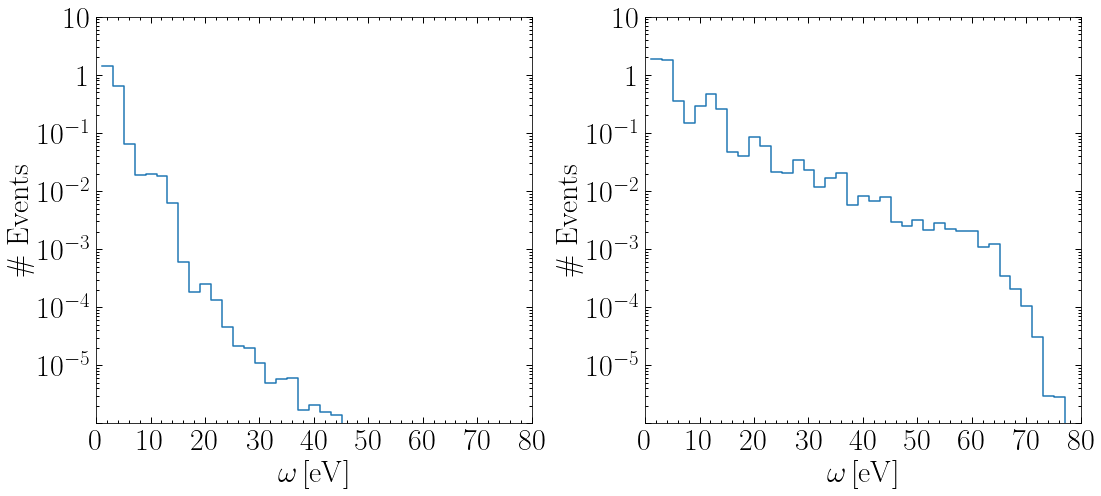

In [5]:
save_fig = False

ncols = 2
fig, axes = plt.subplots(nrows=1, ncols=2, 
                             figsize=(7*1.1*ncols, 7))

E_min = 0
E_max = 80
dE = 10.

log_events_min = -6
log_events_max = 1

for c in range(ncols):
    
    set_custom_tick_options(axes[c])
    set_custom_axes(axes[c], 'x', E_min, E_max,
                   ax_type = 'lin', 
                   label = r'$\omega \, [\mathrm{eV}]$', 
                   step = dE)
    set_custom_axes(axes[c], 'y', log_events_min, log_events_max,
                   ax_type = 'log', 
                   label = r'$\# \ \mathrm{Events}$', 
                   show_first = False)

axes[0].step(
    E_bin_LHS, 
    np.log10(binned_scatter_rate_E_light),
    where = 'post'
)
    
axes[1].step(
    E_bin_LHS, 
    np.log10(binned_scatter_rate_E_heavy),
    where = 'post'
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Si_binned_scatter_rate_2x2x2.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()

### Cross Section Reach

#### Data

In [5]:
[ masses_MeV, cs_reach ] = data.get_cs_reach(med_FF = 0.)
[ masses_MeV, cs_reach_10 ] = data.get_cs_reach(med_FF = 0., expt_E_threshold=10)

#### Plot

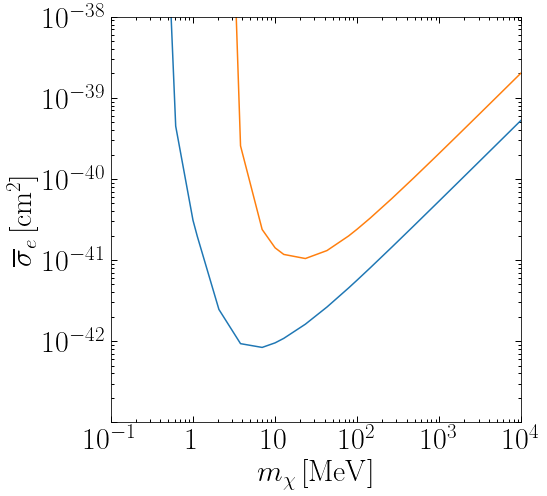

In [7]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

log_mX_min = -1
log_mX_max = 4

log_cs_min = -43
log_cs_max = -38

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', log_mX_min, log_mX_max,
               ax_type = 'log', 
               label = r'$m_\chi \, [\mathrm{MeV}]$')
set_custom_axes(axes, 'y', log_cs_min, log_cs_max,
               ax_type = 'log', 
               label = r'$\overline{\sigma}_e \, [\mathrm{cm}^2]$', 
               show_first = False)

axes.plot(
    np.log10(masses_MeV), 
    np.log10(cs_reach)
)

axes.plot(
    np.log10(masses_MeV), 
    np.log10(cs_reach_10)
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Si_cs_reach_2x2x2.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()